In [3]:

# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install lightgbm
# %pip install xgboost
# %pip install keras



import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import seaborn as sns

In [4]:
data = pd.read_csv("air_quality_health_impact_data.csv", low_memory=False)
data.head(3)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0


In [5]:
def __describe_data(data):
  display(data.describe(include = "all").T)

__describe_data(data)

,count,mean,std,min,25%,50%,75%,max
RecordID,5811.0,2906.000000,1677.635538,1.000000,1453.500000,2906.000000,4358.500000,5811.000000
AQI,5811.0,248.438476,144.777638,0.005817,122.951293,249.127841,373.630668,499.858837
PM10,5811.0,148.654997,85.698500,0.015848,75.374954,147.634997,222.436759,299.901962
PM2_5,5811.0,100.223714,58.096612,0.031549,49.435171,100.506337,151.340260,199.984965
NO2,5811.0,102.293445,57.713175,0.009625,53.538538,102.987736,151.658516,199.980195
SO2,5811.0,49.456838,28.530329,0.011023,24.887264,49.530165,73.346617,99.969561
O3,5811.0,149.312431,86.534240,0.001661,73.999665,149.559871,223.380126,299.936812
Temperature,5811.0,14.975500,14.483067,-9.990998,2.481500,14.942428,27.465374,39.963434
Humidity,5811.0,54.776853,26.020786,10.001506,31.995262,54.543904,77.641639,99.997493
WindSpeed,5811.0,9.989177,5.776950,0.002094,4.952343,10.051742,14.971840,19.999139


In [6]:
data.isnull().sum().sort_values(ascending = False)

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

x

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['recordid', 'aqi', 'pm10', 'pm2_5', 'no2', 'so2', 'o3', 'temperature',
       'humidity', 'windspeed', 'respiratorycases', 'cardiovascularcases',
       'hospitaladmissions', 'healthimpactscore', 'healthimpactclass'],
      dtype='object')

In [9]:
print(len(data.columns))

15


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordid             5811 non-null   int64  
 1   aqi                  5811 non-null   float64
 2   pm10                 5811 non-null   float64
 3   pm2_5                5811 non-null   float64
 4   no2                  5811 non-null   float64
 5   so2                  5811 non-null   float64
 6   o3                   5811 non-null   float64
 7   temperature          5811 non-null   float64
 8   humidity             5811 non-null   float64
 9   windspeed            5811 non-null   float64
 10  respiratorycases     5811 non-null   int64  
 11  cardiovascularcases  5811 non-null   int64  
 12  hospitaladmissions   5811 non-null   int64  
 13  healthimpactscore    5811 non-null   float64
 14  healthimpactclass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [11]:
last_10_columns = data.columns[7:]
desired_datatype = 'float'
data[last_10_columns] = data[last_10_columns].astype(desired_datatype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordid             5811 non-null   int64  
 1   aqi                  5811 non-null   float64
 2   pm10                 5811 non-null   float64
 3   pm2_5                5811 non-null   float64
 4   no2                  5811 non-null   float64
 5   so2                  5811 non-null   float64
 6   o3                   5811 non-null   float64
 7   temperature          5811 non-null   float64
 8   humidity             5811 non-null   float64
 9   windspeed            5811 non-null   float64
 10  respiratorycases     5811 non-null   float64
 11  cardiovascularcases  5811 non-null   float64
 12  hospitaladmissions   5811 non-null   float64
 13  healthimpactscore    5811 non-null   float64
 14  healthimpactclass    5811 non-null   float64
dtypes: float64(14), int64(1)
memory usage:

EDA: Exploratory Data Analysis

Univariate Analysis

In [12]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of f  ig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = False, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots

    sns.boxplot(x = feature, ax=ax_box2, showmeans=True, color='orange') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.histplot(feature, kde=True, ax=ax_hist2, edgecolor = "white") # For histogram
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram

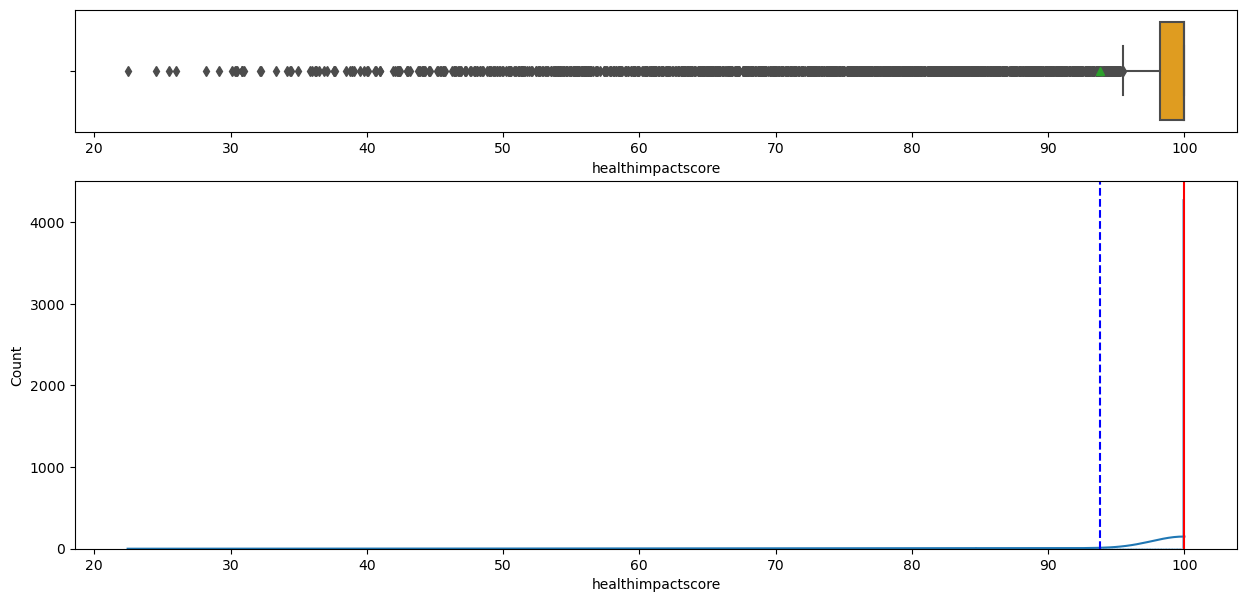

In [13]:
histogram_boxplot(data['healthimpactscore'])

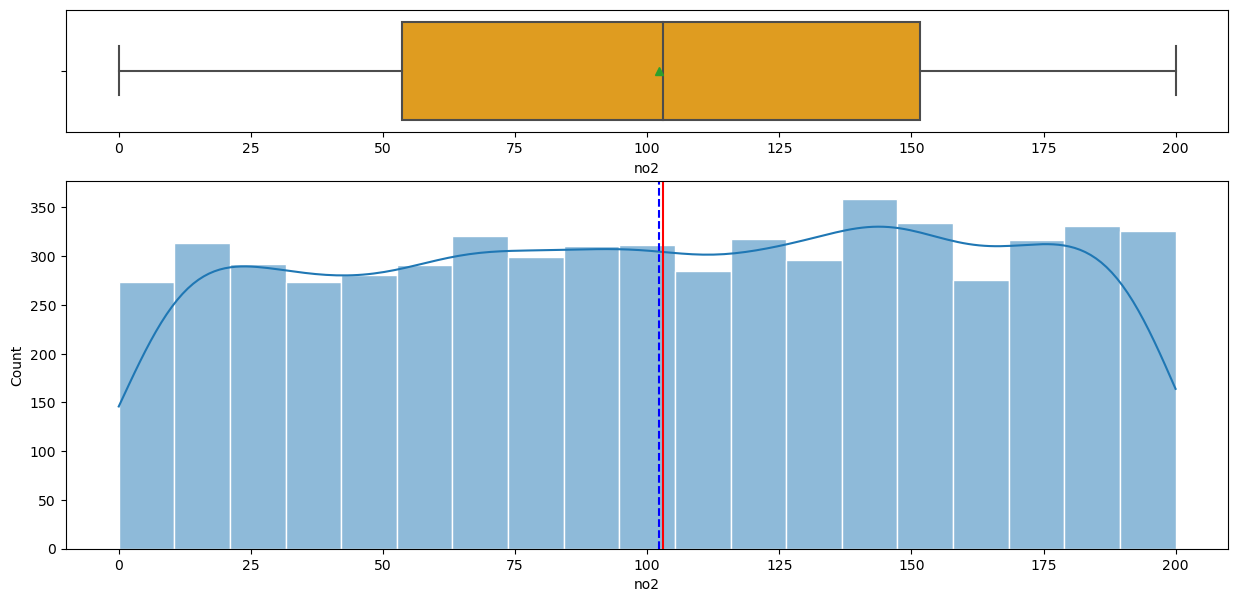

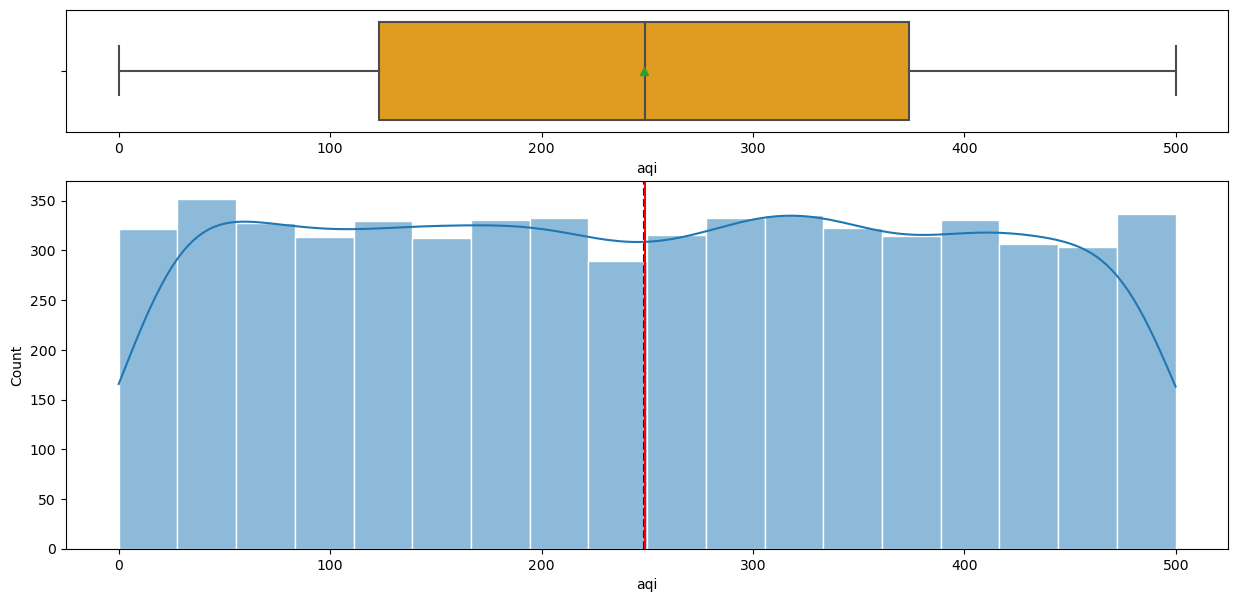

In [14]:
histogram_boxplot(data['no2'])
histogram_boxplot(data['aqi'])

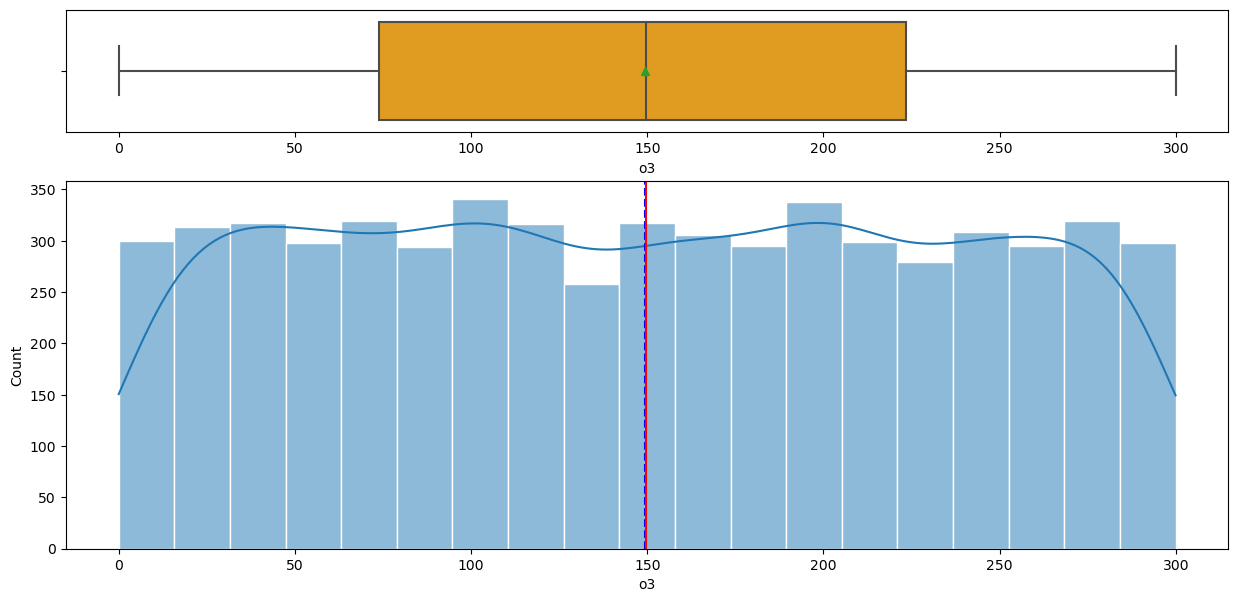

In [15]:
histogram_boxplot(data['o3'])

In [16]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, palette='twilight')

    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() + 100          # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage

    plt.title("Locations")
    plt.show()

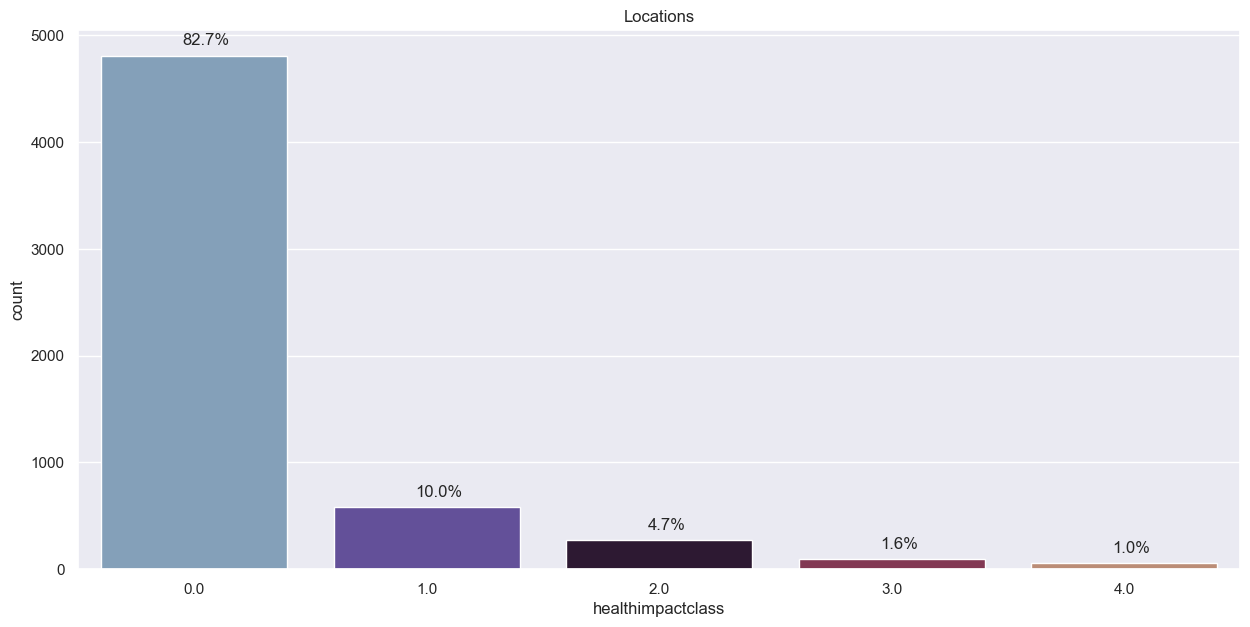

In [17]:
perc_on_bar(data['healthimpactclass'])

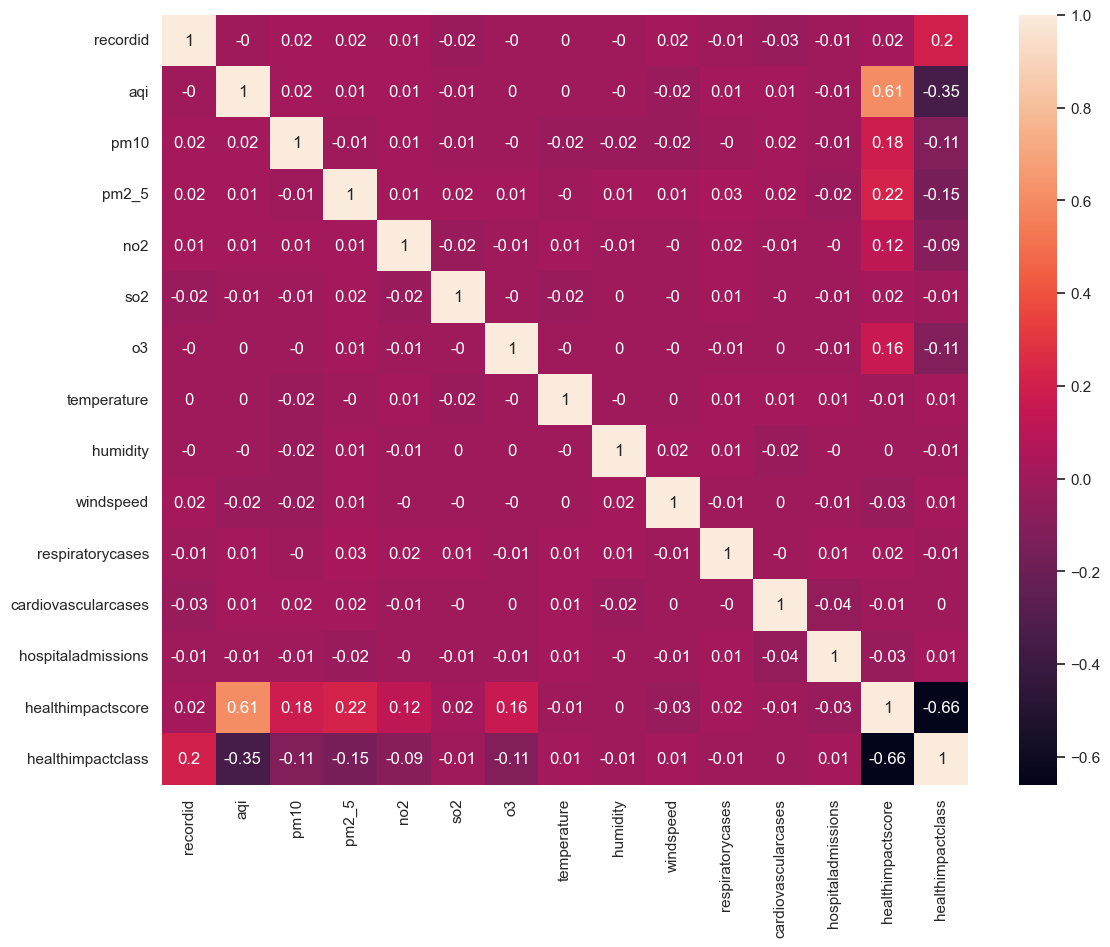

In [18]:
data_corr = round(data.corr(), 2)
plt.figure(figsize=(13,10))
ax = sns.heatmap(data_corr, annot=True)
plt.show(ax)

In [19]:
print(data)

      recordid         aqi        pm10       pm2_5         no2        so2  \
0            1  187.270059  295.853039   13.038560    6.639263  66.161150   
1            2  475.357153  246.254703    9.984497   16.318326  90.499523   
2            3  365.996971   84.443191   23.111340   96.317811  17.875850   
3            4  299.329242   21.020609   14.273403   81.234403  48.323616   
4            5   78.009320   16.987667  152.111623  121.235461  90.866167   
...        ...         ...         ...         ...         ...        ...   
5806      5807  171.112762   11.246387  197.984628  158.643107  17.743678   
5807      5808  490.691667  275.340762   55.774170  132.336871  29.334724   
5808      5809  314.841798   41.892699  184.708551   82.105823  68.334578   
5809      5810  208.080473  165.533785  199.177255  100.796385  87.586488   
5810      5811   83.269257   82.216262  119.968244  193.440691  79.849177   

              o3  temperature   humidity  windspeed  respiratorycases  \
0 

In [20]:
# Separate features and target variable
X = data.drop(columns = ['healthimpactclass', 'healthimpactscore'], axis=1)  # Features
y = data[['healthimpactscore']]  # Target variable

# Calculate the correlation matrix
corr_matrix = X.corr()

# Create a mask to ignore self-correlation (diagonal elements)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Filter out highly correlated features
threshold = 0.7  # Define your threshold for correlation
corr_matrix_filtered = corr_matrix.mask(mask).abs()  # Exclude diagonal elements and take absolute values
highly_correlated_features = [column for column in corr_matrix_filtered.columns if any(corr_matrix_filtered[column] > threshold)]
print(highly_correlated_features)
X_selected = X.drop(columns=highly_correlated_features)
X_selected.columns

[]


Index(['recordid', 'aqi', 'pm10', 'pm2_5', 'no2', 'so2', 'o3', 'temperature',
       'humidity', 'windspeed', 'respiratorycases', 'cardiovascularcases',
       'hospitaladmissions'],
      dtype='object')

In [33]:
## Feature selection using PCA to get the optimal number of features
features = data.drop(columns=["healthimpactclass", "healthimpactscore", "cardiovascularcases", "respiratorycases", "hospitaladmissions"])
# features = data[features]
target = data[["healthimpactscore"]]

features = StandardScaler().fit_transform(features)
print(pd.DataFrame(features))

             0         1         2         3         4         5         6  \
0    -1.731753 -0.422535  1.717775 -1.500822 -1.657549  0.585544 -1.094322   
1    -1.731157  1.567495  1.138971 -1.553395 -1.489825  1.438687  0.234717   
2    -1.730561  0.812063 -0.749340 -1.327427 -0.103549 -1.107022 -1.621528   
3    -1.729964  0.351540 -1.489470 -1.479565 -0.364923 -0.039723 -0.648948   
4    -1.729368 -1.177280 -1.536534  0.893208  0.328238  1.451539  1.068833   
...        ...       ...       ...       ...       ...       ...       ...   
5806  1.729368 -0.534146 -1.603534  1.682875  0.976458 -1.111655  1.514658   
5807  1.729964  1.673422  1.478400 -0.765163  0.520609 -0.705349 -0.476950   
5808  1.730561  0.458697 -1.245897  1.454338 -0.349822  0.661730 -0.505554   
5809  1.731157 -0.278783  0.196972  1.703405 -0.025942  1.336575  0.198287   
5810  1.731753 -1.140946 -0.775328  0.339886  1.579450  1.065356 -1.394141   

             7         8         9  
0    -0.678448  1.139475 -

In [34]:
pca = PCA(.95)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf

,0,1,2,3,4,5,6,7,8,9,healthimpactscore
0,0.180409,2.483475,-0.348894,0.932364,-1.429147,1.679251,0.925489,-0.740606,-0.407257,1.116861,97.244041
1,-0.572934,3.492585,0.091950,-0.467427,-0.587200,1.045227,0.568600,0.858283,-0.308781,-0.108728,100.000000
2,-0.741630,1.255384,-1.498236,1.459901,0.163091,0.495735,-0.287803,1.369424,2.013162,0.163698,100.000000
3,1.755974,0.450372,-2.107769,0.296779,0.051351,1.971594,-0.175109,0.556795,0.082349,-0.230223,100.000000
4,2.036852,1.004390,0.022148,0.257721,1.153955,-1.807085,-1.314718,1.055442,-0.246161,0.513007,95.182643
...,...,...,...,...,...,...,...,...,...,...,...
5806,0.154398,-2.393324,-0.390069,-1.906844,1.074923,-1.633514,-0.512503,-1.566302,0.114392,-0.755211,100.000000
5807,-3.068757,-0.887369,-0.165217,-0.347893,-0.046810,-0.021789,1.392431,0.529176,-0.445793,-0.755869,100.000000
5808,0.768855,-0.919568,0.877947,-0.895490,1.392862,0.455280,1.048472,-1.818147,0.284828,-1.410175,100.000000
5809,-0.033610,-1.151636,1.341606,-0.383712,1.201640,-1.750079,1.493891,0.055801,-1.072399,-0.233545,100.000000


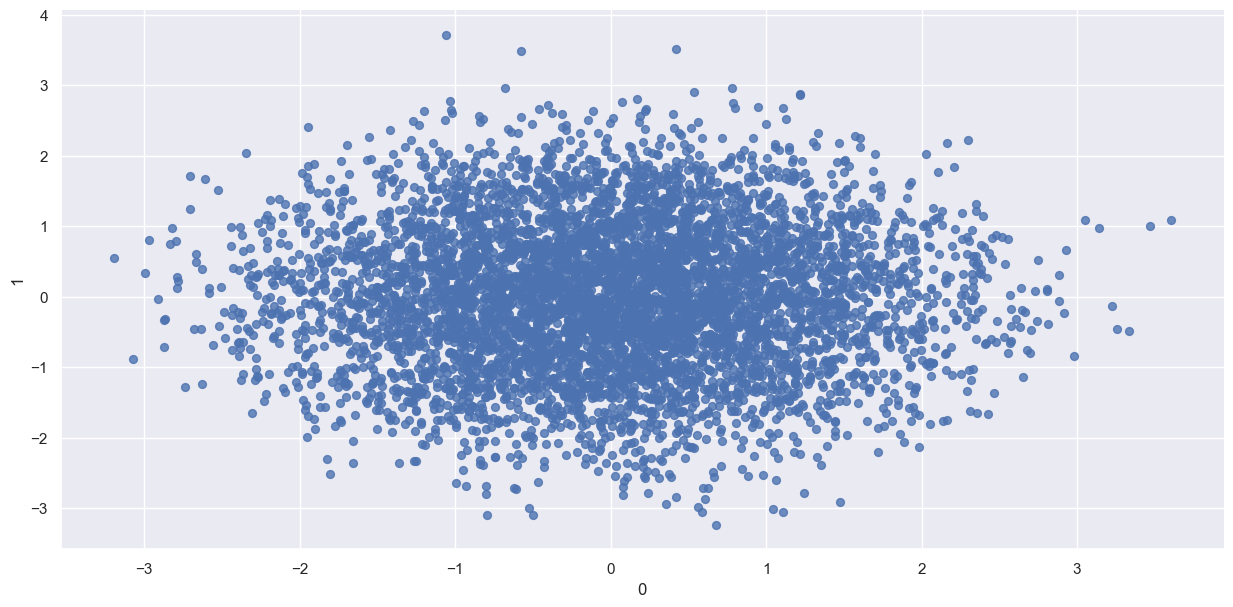

In [36]:
# @title 0 vs 1

from matplotlib import pyplot as plt
finalDf.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
models = {
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [2, 5, 10]
        }
    },
    'xgb': {
        'model' : xgb.XGBRegressor(),
        'params': {
            'objective': ['reg:squarederror'],
            'eval_metric': ['rmse'],
            'eta': [0.01, 0.05, 0.1],
            'max_depth': [3, 6, 9],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }
    },
    'lgm' : {
        'model': lgb.LGBMRegressor(),
        'params': {
            'learning_rate': [0.01, 0.05, 0.1],
            'num_leaves': [31, 50, 100],
            'n_estimators': [50, 100, 200],
            'verbose': [0],
            'feature_fraction': [0.8, 1.0]
        }
    }
}

In [38]:
models = models
best_params = {}
model_results = []
grid = False

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=234
)
y_test = np.array(y_test)

for name, model in models.items():
    print(model)
    print("="*50)
    print(f"Fitting and tuning {name}")
    print("="*50)
    if grid:
        print("Using GridSearch")
        search = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error', random_state = 234, verbose=0)
    else:
        print("Using RandomSearchCV")
        search = RandomizedSearchCV(model['model'], model['params'], n_iter=2, cv=5, scoring='neg_mean_squared_error', random_state=234, verbose=0)

    gr_search = search.fit(X_train, y_train)
    print(f'Best Parameters = {gr_search.best_params_}')

    best_params[name] = gr_search.best_estimator_
    best_score = search.best_score_
    y_pred = gr_search.best_estimator_.predict(X_test)
    metrics_data = {"actual_values":y_test, "predicted":y_pred}
    
    rmse_y1 = np.sqrt(np.mean((y_test - y_pred)**2))
    mae = np.mean(np.abs(y_test - y_pred))
    r2_y1 = r2_score(y_test, y_pred=y_pred)
    model_results.append({"name": name, "rmse": rmse_y1, "mae":mae, "r2_y1": r2_y1, "data": metrics_data})


{'model': GradientBoostingRegressor(), 'params': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10]}}
Fitting and tuning Gradient Boosting
Using RandomSearchCV


In [26]:
model_results

[{'name': 'Gradient Boosting',
  'rmse': 18.403755911007583,
  'mae': 10.54684239793795,
  'r2_y1': 0.9695569215145148,
  'data': {'actual_values': array([[100.        ],
          [ 86.16448009],
          [ 63.13774496],
          ...,
          [100.        ],
          [ 98.44202961],
          [100.        ]]),
   'predicted': array([102.80285328,  94.041611  ,  69.49194517, ...,  99.57183448,
           89.14057231,  99.97439612])}},
 {'name': 'xgb',
  'rmse': 18.217775131914195,
  'mae': 10.732575633107361,
  'r2_y1': 0.9520704270883626,
  'data': {'actual_values': array([[100.        ],
          [ 86.16448009],
          [ 63.13774496],
          ...,
          [100.        ],
          [ 98.44202961],
          [100.        ]]),
   'predicted': array([107.87157,  97.36167,  69.98077, ...,  98.97292,  86.60981,
          100.4545 ], dtype=float32)}},
 {'name': 'lgm',
  'rmse': 18.203852455417817,
  'mae': 10.561112115260439,
  'r2_y1': 0.972909302074706,
  'data': {'actual_val

In [29]:
model_results_sorted = pd.DataFrame(model_results)[["name", "rmse", "mae", "r2_y1"]]
model_results_sorted

,name,rmse,mae,r2_y1
0,Gradient Boosting,18.403756,10.546842,0.969557
1,xgb,18.217775,10.732576,0.952070
2,lgm,18.203852,10.561112,0.972909


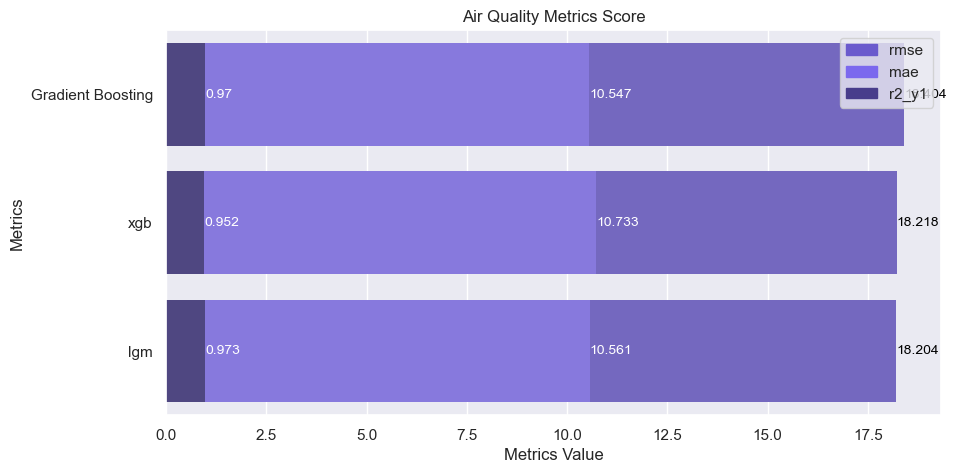

In [30]:

def plot_metrics(data, title):
    data = round(data, 3)
    plt.figure(figsize=(10,5))
    sns.set_style("darkgrid")

    ax = sns.barplot(data, x="rmse", y = "name", orient="h", color="slateblue", linewidth=0)
    ax.bar_label(ax.containers[0], fontsize=10, color="black")
    ax2 = sns.barplot(data, x="mae", y="name", orient="h", color='mediumslateblue', linewidth=0)
    ax2.bar_label(ax2.containers[1], fontsize=10, color="white")
    ax3 = sns.barplot(data, x="r2_y1", y="name", orient="h", color='darkslateblue', linewidth=0)
    ax3.bar_label(ax3.containers[2], fontsize=10, color= "white")

    top_bar = mpatches.Patch(color='slateblue', label='rmse')
    middle_bar = mpatches.Patch(color='mediumslateblue', label='mae')
    bottom_bar = mpatches.Patch(color='darkslateblue', label='r2_y1')

    plt.title(title)
    plt.xlabel("Metrics Value")
    plt.ylabel("Metrics")
    plt.legend(handles=[top_bar, middle_bar, bottom_bar])
    plt.show()
    
plot_metrics(model_results_sorted, "Air Quality Metrics Score")

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from scikeras.wrappers import KerasRegressor

def nn_model2(data_features, data_target):
    
    X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=234)


    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    def make_regression_ann(initializer='uniform', activation='relu', learning_rate= 0.001, rate = 0.15):

        model = Sequential()
        model.add(Dense(units=64, input_dim=(X_train_scaled.shape[1]), kernel_initializer=initializer, activation=activation))
        model.add(Dense(units=64, kernel_initializer=initializer, activation=activation))
        model.add(Dropout(rate=rate))
        model.add(Dense(units=32, kernel_initializer=initializer, activation=activation))
        model.add(BatchNormalization())
        model.add(Dense(units=16, kernel_initializer=initializer, activation=activation))
        model.add(Dense(1, kernel_initializer=initializer))
        model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate= learning_rate))

        return model

    param_grid = {
        'model__initializer': ['normal', 'uniform'],
        'model__activation': ['relu', 'sigmoid'],
        'batch_size': [16, 32, 64],
        'epochs': [50],
        "model__learning_rate": [0.001, 0.005, 0.01],
        "model__rate": [0, 0.15, 0.25]
    }

    random_search = RandomizedSearchCV(
        estimator=KerasRegressor(make_regression_ann, verbose=0),
        param_distributions=param_grid,
        cv=5
    )

    random_result = random_search.fit(X_train_scaled, y_train)

    model = Sequential()
    model.add(Dense(units=64, input_dim=(X_train_scaled.shape[1]), kernel_initializer=random_result.best_params_["model__initializer"], activation=random_result.best_params_["model__activation"]))
    model.add(Dense(units=64, kernel_initializer=random_result.best_params_["model__initializer"], activation=random_result.best_params_["model__activation"]))
    model.add(Dropout(rate=random_result.best_params_["model__rate"]))
    model.add(Dense(units=32, kernel_initializer=random_result.best_params_["model__initializer"], activation=random_result.best_params_["model__activation"]))
    model.add(BatchNormalization())
    model.add(Dense(units=16, kernel_initializer=random_result.best_params_["model__initializer"], activation=random_result.best_params_["model__activation"]))
    model.add(Dense(1, kernel_initializer=random_result.best_params_["model__initializer"]))
    model.compile(optimizer=Adam(learning_rate=random_result.best_params_["model__learning_rate"]), loss="mean_squared_error")
    
    model.fit(X_train_scaled, y_train, batch_size=random_result.best_params_["batch_size"], epochs=random_result.best_params_["epochs"])
    y_test = np.array(y_test)
    y_pred = model.predict(X_test_scaled)
    
    
    rmse_y1 = np.sqrt(np.mean((y_test - y_pred.flatten())**2))
    mae = np.mean(np.abs(y_test - y_pred.flatten()))
    r2_y1 = r2_score(y_test, y_pred=y_pred.flatten())

    nn = {"name": "Neural Network", "rmse": rmse_y1, "mae": mae, "r2_y1": r2_y1, "target": target}
    return nn

dm_nn_model = nn_model2(features, target)

print(dm_nn_model)


KeyboardInterrupt: 

In [ ]:
np.shape(features)

NameError: name 'np' is not defined